Classes: The dataset has two target classes:
Malignant (denoted by 0)
Benign (denoted by 1)

- radius_mean: Mean of distances from the center to points on the perimeter.
- texture_mean: Standard deviation of gray-scale values.
- perimeter_mean: Mean of perimeter values.
- area_mean: Mean of area values.
- smoothness_mean: Mean of local variation in radius lengths.
- compactness_mean: Mean of perimeter^2 / area - 1.0
- concavity_mean: Mean of severity of concave portions of the contour.
- concave points_mean: Mean for the number of concave portions of the contour.
- symmetry_mean: Mean of symmetry.
- fractal_dimension_mean: Mean of the "coastline approximation" - 1.
- radius_se: Standard error for radius.
- texture_se: Standard error for texture.
- perimeter_se: Standard error for perimeter.
- area_se: Standard error for area.
- smoothness_se: Standard error for smoothness.
- compactness_se: Standard error for compactness.
- concavity_se: Standard error for concavity.
- concave points_se: Standard error for concave points.
- symmetry_se: Standard error for symmetry.
- fractal_dimension_se: Standard error for fractal dimension.
- radius_worst: Worst or largest radius value.
- texture_worst: Worst texture value.
- perimeter_worst: Worst perimeter value.
- area_worst: Worst area value.
- smoothness_worst: Worst smoothness value.
- compactness_worst: Worst compactness value.
- concavity_worst: Worst concavity value.
- concave points_worst: Worst concave points value.
- symmetry_worst: Worst symmetry value.
- fractal_dimension_worst: Worst fractal dimension value.

### Libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder


## Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
#from xgboost import XGBRegressor

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)


### Data

In [ ]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Diagnosis'] = encoder.fit_transform(data['Diagnosis'])

In [ ]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['Diagnosis'].value_counts()

,count
Diagnosis,
0,357
1,212


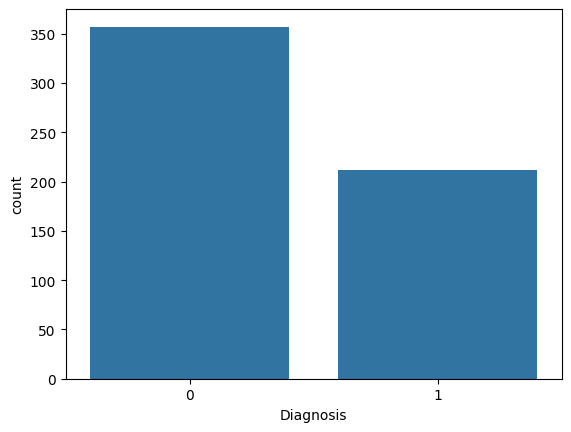

In [ ]:
sns.countplot(x= 'Diagnosis',data = data)
plt.show()


```

### Shuffling and Splitting

In [ ]:
x = data[['texture_mean', 'texture_worst']]
y = data['Diagnosis']

In [ ]:
x_cont,x_test,y_cont,y_test = train_test_split(x,y,test_size = 69 , random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_cont, y_cont, test_size= 100 , random_state = 42)

In [ ]:
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('--'*20)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)
print('--'*20)
print('x_valid shape: ',x_val.shape)
print('y_valid shape: ',y_val.shape)

x_train shape:  (400, 2)
y_train shape:  (400,)
----------------------------------------
x_test shape:  (69, 2)
y_test shape:  (69,)
----------------------------------------
x_valid shape:  (100, 2)
y_valid shape:  (100,)


### preprocessing

# *scaling*

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

In [ ]:
x_train_scaled

,texture_mean,texture_worst
0,-0.144893,-0.060143
1,1.244993,0.713190
2,0.752174,0.452250
3,-1.423498,-1.235167
4,-0.201670,0.289359
...,...,...
395,0.867998,0.512345
396,0.581845,0.803334
397,-0.696760,-0.420715
398,-0.787602,-1.271540


# Feature Selection:

In [ ]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
corr_matrix = data.corr()

In [ ]:
target_corr = corr_matrix['Diagnosis'].drop('Diagnosis').abs().sort_values(ascending=False)

In [ ]:
top2_features = target_corr.head(2).index.tolist()
print("Top 2 features:", top2_features)

Top 2 features: ['concave points_worst', 'perimeter_worst']


#

```
`# This is formatted as code`
```

## Preformance --> Train, Test

In [ ]:
from sklearn .svm import SVC
from sklearn import svm

In [ ]:
model = SVC(kernel='linear', C=0.1)

In [ ]:
model.fit(x_train_scaled,y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_linear = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy: {accuracy:.4f}")

Linear Kernel Accuracy: 0.3333


In [ ]:
from svm_margin_plot import plot_svm_boundary

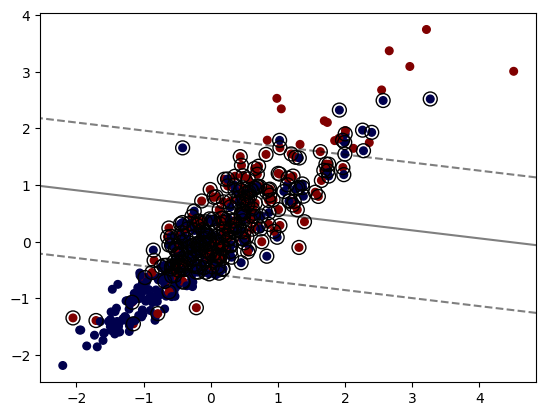

In [ ]:
plot_svm_boundary(model,x_train_scaled,y_train)

In [ ]:

model_rbf= SVC(kernel = 'rbf' , gamma =1)

In [ ]:
model_rbf.fit(x_train_scaled,y_train)

SVC(gamma=1)

In [ ]:
y_pred_model_rbf = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_model_rbf)
print(f"rbf model Accuracy: {accuracy:.4f}")

rbf model Accuracy: 0.3333


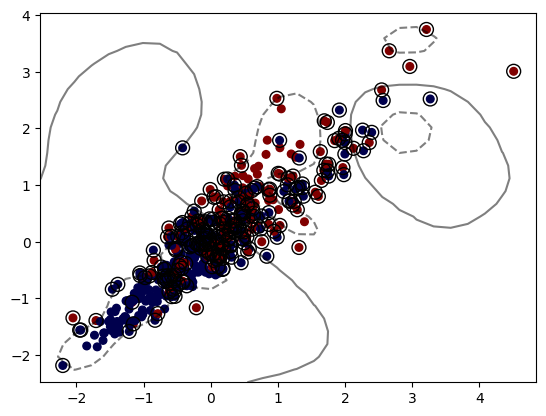

In [ ]:
plot_svm_boundary(model_rbf,x_train_scaled,y_train)

In [ ]:
model_poly = SVC(kernel='poly', C=00.1)

In [ ]:
model_poly.fit(x_train_scaled, y_train)

SVC(C=0.1, kernel='poly')

In [ ]:
y_pred_model_poly= model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_model_poly )
print(f"poly model Accuracy: {accuracy:.4f}")

poly model Accuracy: 0.3333


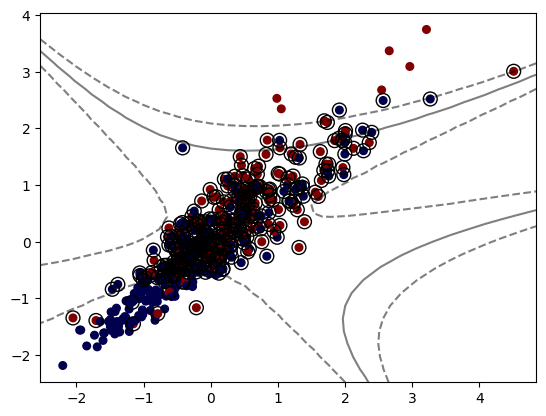

In [ ]:
plot_svm_boundary(model_poly,x_train_scaled,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_re = LogisticRegression()

In [ ]:
logistic_re.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_re.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.7101449275362319

In [ ]:
y_pred_train = logistic_re.predict(x_train_scaled)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.7175

In [ ]:
model_names = ['Linear ', 'RBF ', 'Poly ', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_linear),
              accuracy_score(y_test, y_pred_model_rbf),
              accuracy_score(y_test, y_pred_model_poly),
              accuracy_score(y_test, y_pred)]

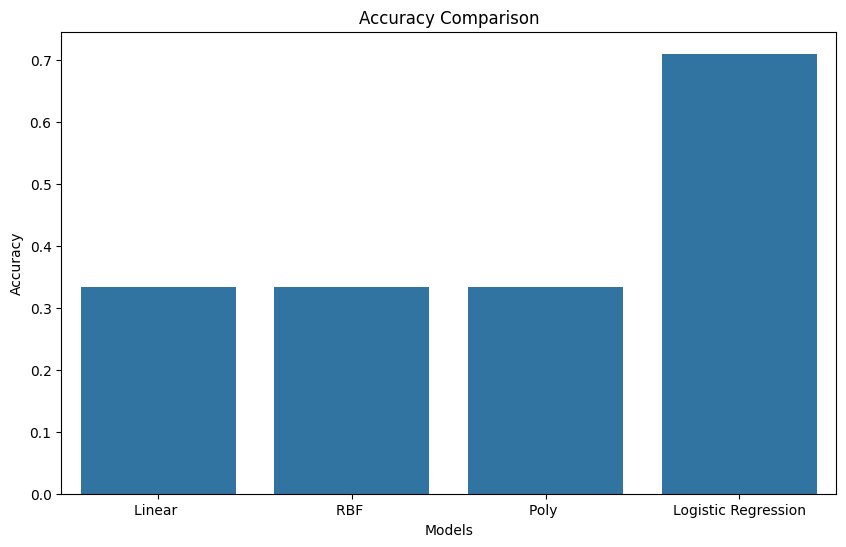

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
param ={
  'kernel':['linear','poly','rbf'],
  'C': [0.01, 0.1, 1, 10, 100],
  'gamma':[0.001, 0.01, 0.1, 1]

}

In [ ]:
model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
grid_search = GridSearchCV(model,param)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
model.fit(x_train_scaled,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6811594202898551


In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
best_svc = svm.SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svc.fit(x_train_scaled, y_train)

SVC(C=100, gamma=0.1)

In [ ]:
y_pred = best_svc.predict(x_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.6522
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        46
           1       0.48      0.48      0.48        23

    accuracy                           0.65        69
   macro avg       0.61      0.61      0.61        69
weighted avg       0.65      0.65      0.65        69



In [ ]:
import time
cases = [
    ('Case 1', SVC(kernel='linear', C=1), x_train_scaled[:int(0.1 * len(x_train_scaled))], y_train[:int(0.1 * len(y_train))]),
    ('Case 2', SVC(kernel='linear', C=1), x_train_scaled, y_train),
    ('Case 3', SVC(kernel='rbf', C=1, gamma=0.01), x_train_scaled[:int(0.1 * len(x_train_scaled))], y_train[:int(0.1 * len(y_train))]),
    ('Case 4', SVC(kernel='rbf', C=1, gamma=0.01), x_train_scaled, y_train),
]
T_time = []
P_time = []

for case_name, model, X_train, Y_train in cases:

  start_t_t = time.time()
  model.fit(X_train, Y_train)
  end_t_t = time.time()

  start_P_t = time.time()
  model.predict(X_train)
  end_P_t = time.time()


  T_time.append(end_t_t - start_t_t)
  P_time.append(end_P_t - start_P_t)

print("Training Times:", T_time)
print("Prediction Times:", P_time)

Training Times: [0.002450227737426758, 0.004850149154663086, 0.0024521350860595703, 0.005101919174194336]
Prediction Times: [0.0011332035064697266, 0.0029332637786865234, 0.0010292530059814453, 0.006127834320068359]


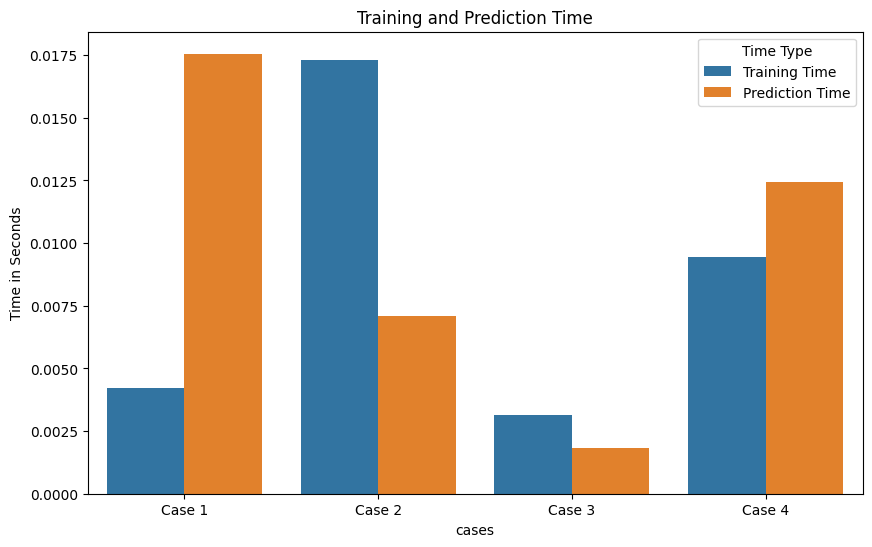

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='Time (s)', hue='Time Type', data=df_time_melted)
plt.title('Training and Prediction Time')
plt.ylabel('Time in Seconds')
plt.xlabel('cases')
plt.show()